In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/ocd-patient-dataset-demographics-and-clinical-data/ocd_patient_dataset.csv


In [2]:
path = '/kaggle/input/ocd-patient-dataset-demographics-and-clinical-data/ocd_patient_dataset.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [6]:
data.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


In [7]:
num_features = [feature for feature in data.columns if data[feature].dtype !='O']
print('There are {} numerical features : {}'.format(len(num_features), num_features))

There are 5 numerical features : ['Patient ID', 'Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']


In [8]:
cont_features=[feature for feature in num_features if len(data[feature].unique())>=10]
print('There are {} continuous features : {}'.format(len(cont_features), cont_features))

There are 5 continuous features : ['Patient ID', 'Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']


In [9]:
cat_features = [feature for feature in data.columns if data[feature].dtype =='O']
print('There are {} categorical features : {}'.format(len(cat_features), cat_features))

There are 12 categorical features : ['Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'OCD Diagnosis Date', 'Previous Diagnoses', 'Family History of OCD', 'Obsession Type', 'Compulsion Type', 'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications']


In [10]:
cat_features.remove('OCD Diagnosis Date')

In [11]:
data[data['Medications'].isna() | data['Previous Diagnoses'].isna()]

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
8,9039,36,Male,Hispanic,Divorced,College Degree,2016-09-19,84,NaN,No,Harm-related,Praying,37,24,No,Yes,NaN
10,9672,21,Female,African,Married,College Degree,2014-12-18,95,GAD,Yes,Harm-related,Checking,40,26,Yes,No,NaN
12,6237,23,Female,Hispanic,Married,High School,2015-06-09,48,Panic Disorder,No,Contamination,Praying,14,27,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,9561,24,Female,Asian,Married,Some College,2018-01-08,95,Panic Disorder,Yes,Contamination,Praying,15,9,No,Yes,NaN
1491,8451,52,Female,Hispanic,Married,Some College,2014-12-27,62,MDD,Yes,Harm-related,Ordering,38,9,Yes,Yes,NaN
1493,1819,58,Female,Hispanic,Divorced,Some College,2016-07-07,22,NaN,Yes,Contamination,Praying,10,1,No,Yes,SNRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine


In [12]:
date = pd.to_datetime(data['OCD Diagnosis Date'])

In [13]:
year = date.dt.year

In [14]:
data['OCD Diagnosis Date'] = year

In [15]:
data

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


In [16]:
for cat in cat_features:
        print("Unique values of {}:".format(cat), len(data[cat].unique()))

Unique values of Gender: 2
Unique values of Ethnicity: 4
Unique values of Marital Status: 3
Unique values of Education Level: 4
Unique values of Previous Diagnoses: 5
Unique values of Family History of OCD: 2
Unique values of Obsession Type: 5
Unique values of Compulsion Type: 5
Unique values of Depression Diagnosis: 2
Unique values of Anxiety Diagnosis: 2
Unique values of Medications: 4


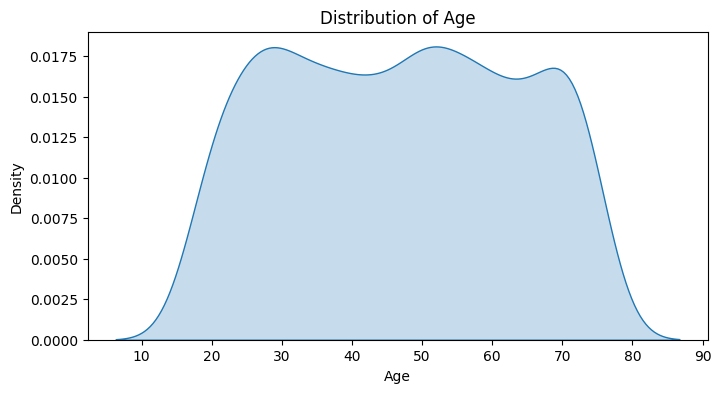

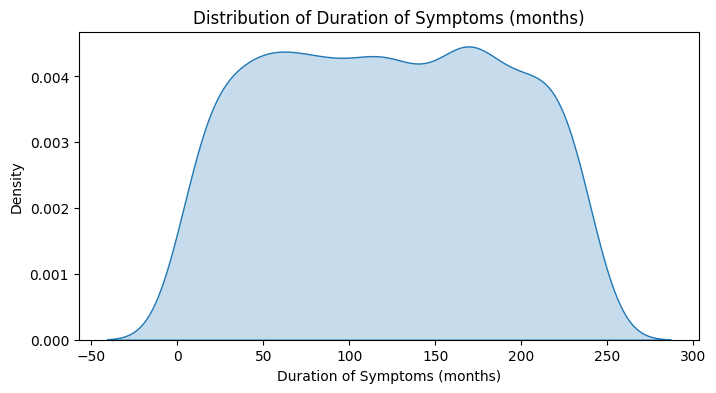

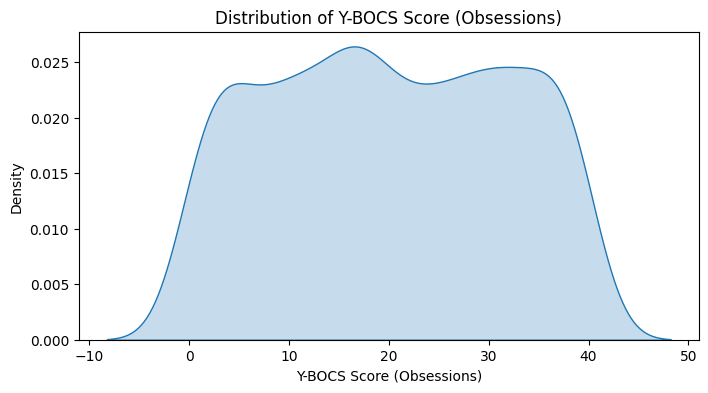

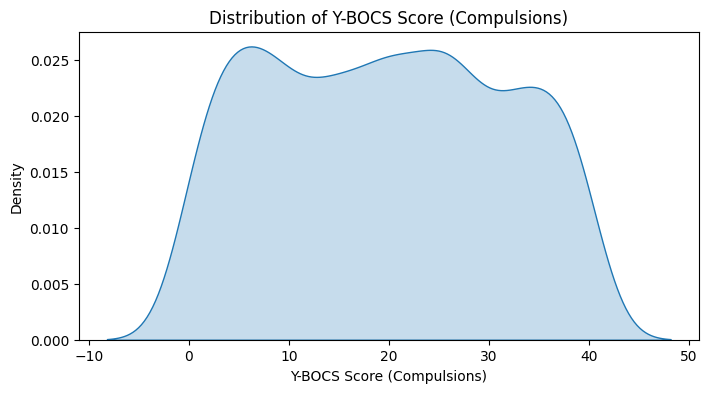

In [17]:
for col in num_features[1:]:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data[col], fill=True, legend=False)
    plt.title(f'Distribution of {col}')
    plt.show()

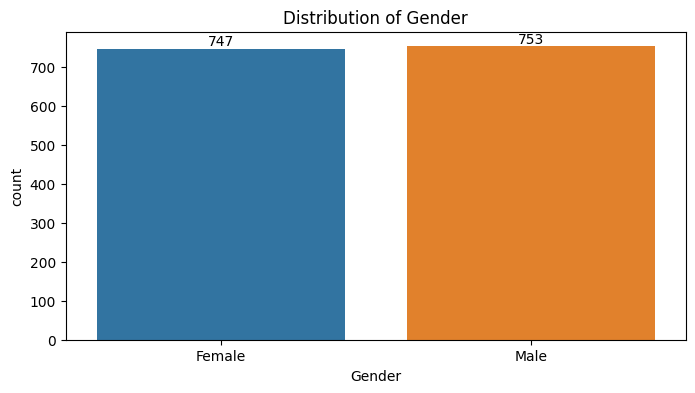

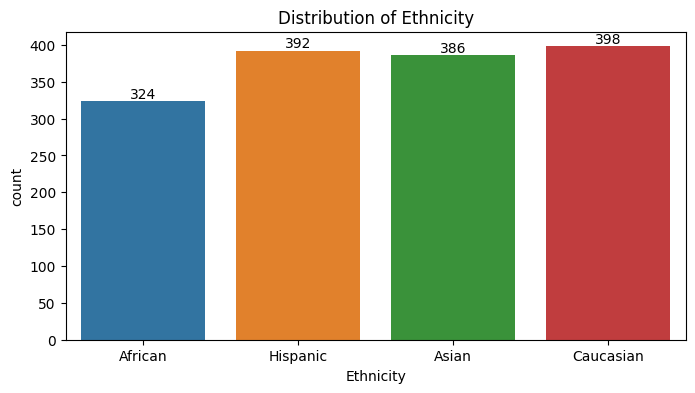

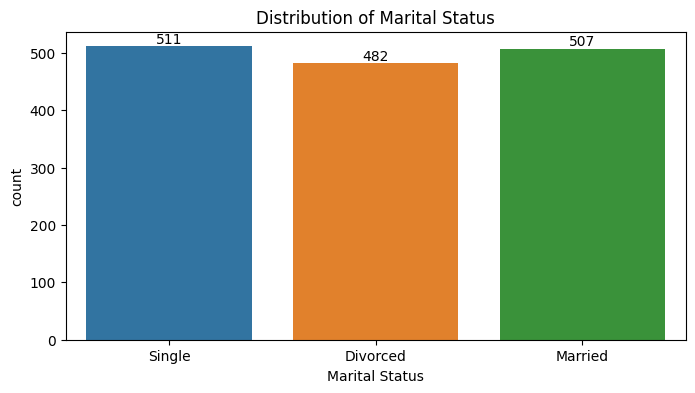

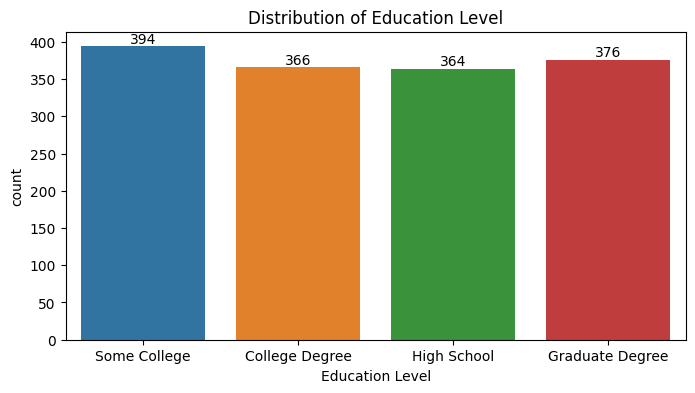

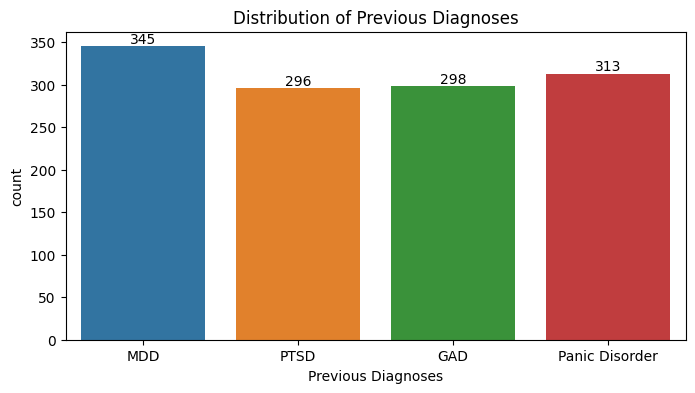

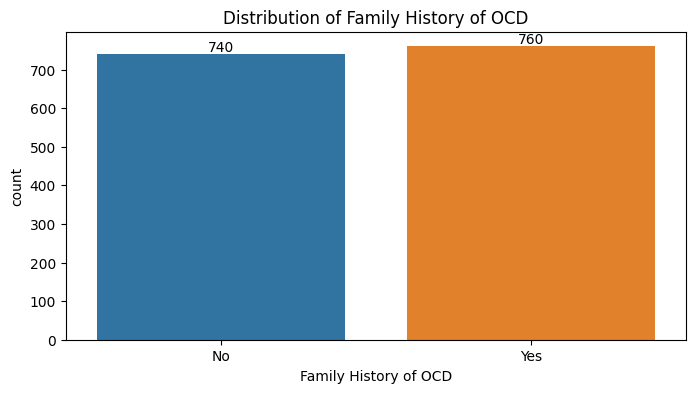

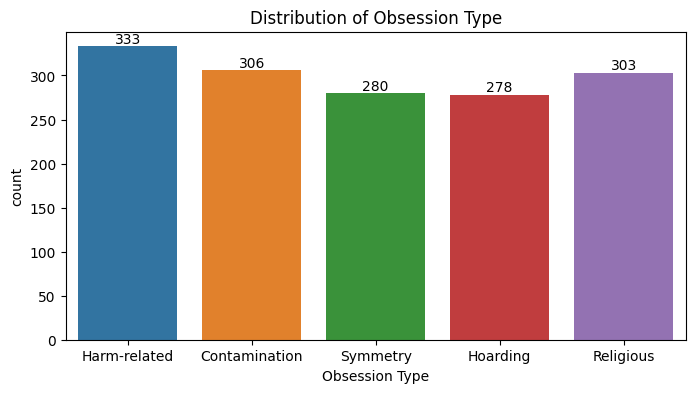

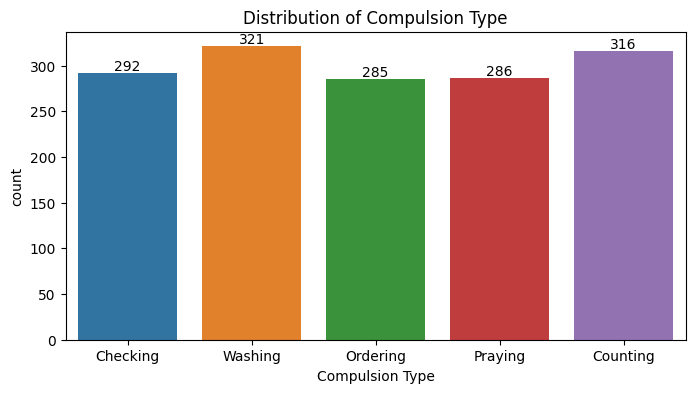

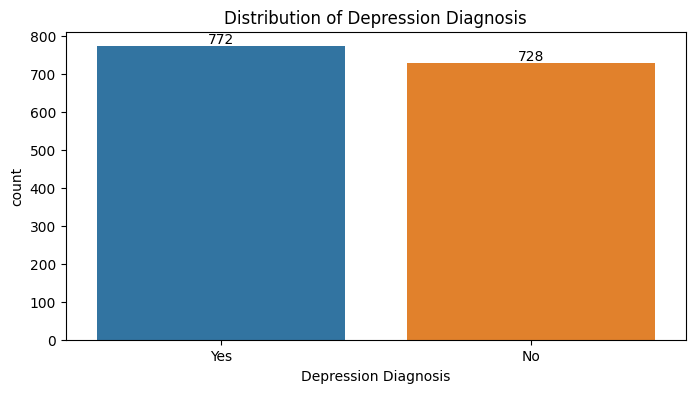

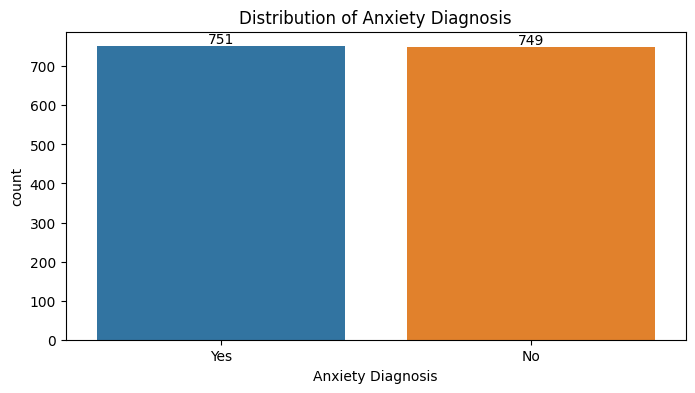

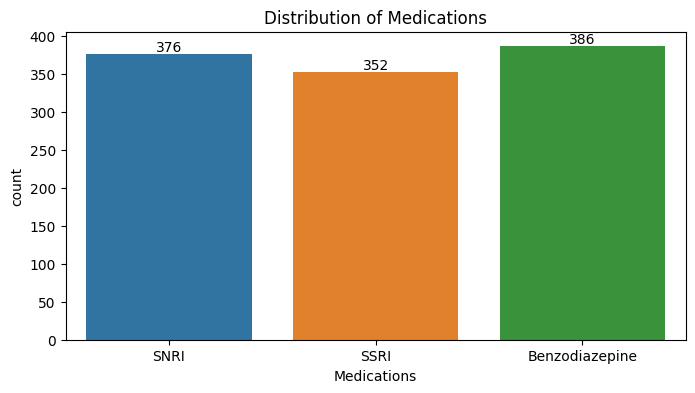

In [18]:
for col in cat_features:
    plt.figure(figsize=(8, 4))
    plot = sns.countplot(data=data, x=data[col])
    plot.bar_label(plot.containers[0])
    plt.title(f'Distribution of {col}')
    plt.show()

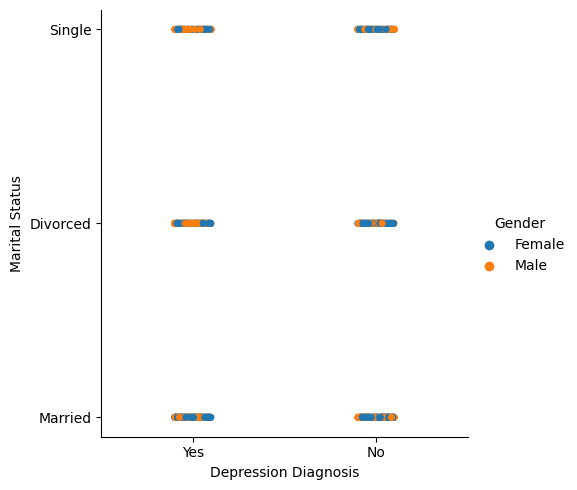

In [19]:
sns.catplot(x='Depression Diagnosis', y='Marital Status', hue='Gender', data=data)